In [ ]:
from pandas.core import describe
#import nessary liberaries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
105                7.6               3.0                6.6               2.1   
106                4.9               2.5                4.5               1.7   
107                7.3               2.9                6.3               1.8   
108                6.7               2.5                5.8               1.8   
109                7.2               3.6                6.1               2.5   

     target  
0       0.0  

<function matplotlib.pyplot.show(close=None, block=None)>

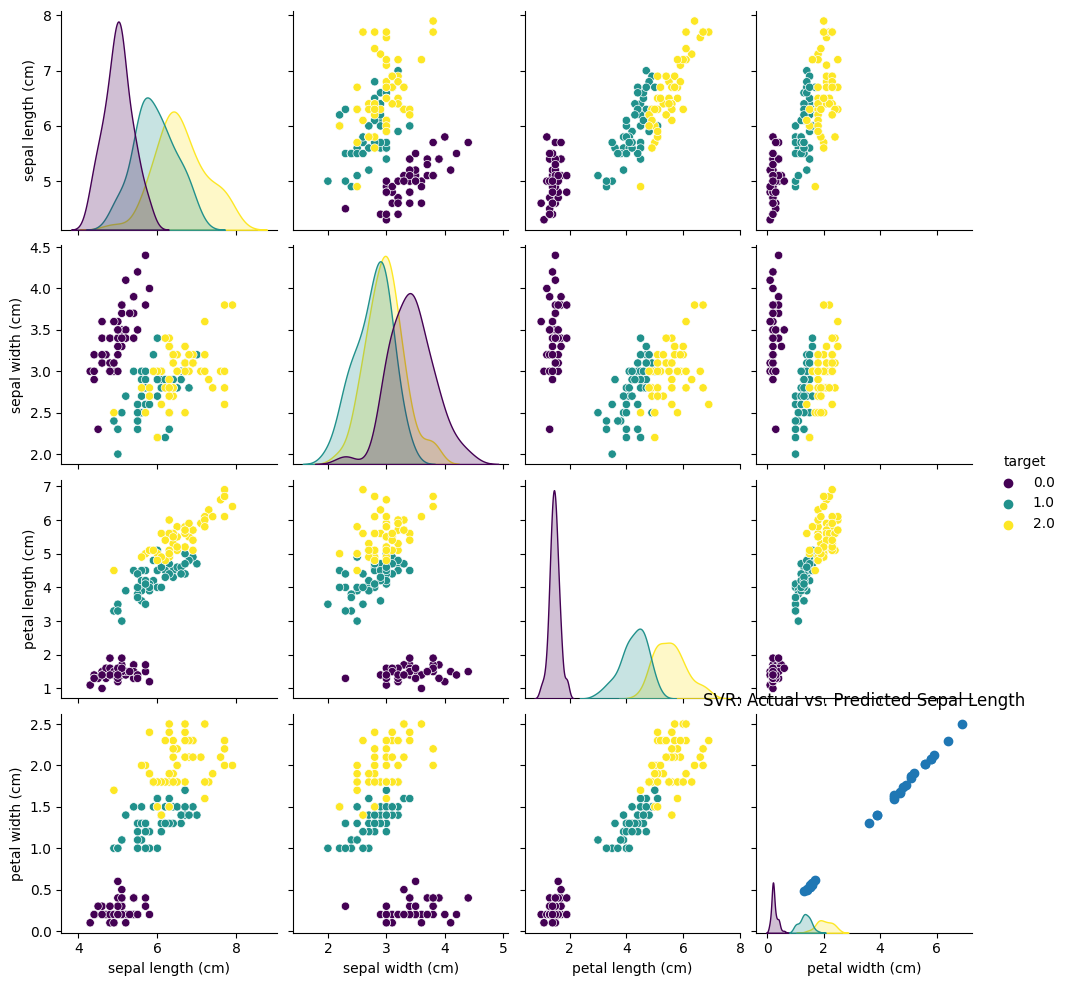

In [ ]:
#load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#create a dataframe from the iris dataset
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

#display the first few rows of the datasets
print(iris_df.head(110))
#get a summary of the datasets
print(iris_df.info)
#get descriptive statistics of the numerical features
print(iris_df.describe())
#check the unique values in the target column(species)
print(iris_df['target'].unique())
#for demonstration purposes , lets use sepal length as our target variable(regression)
y_regression = X[:, 2] #sepal length as a target
#pairplot to visualise relationships between features
import seaborn as sns
sns.pairplot(iris_df, hue='target',palette='viridis')
plt.show
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_regression,test_size=0.2, random_state=42)
#create an svr model
svr = SVR(kernel='linear')
#train the svr model
svr.fit(X_train, y_train)
#make predictions on the test set
y_pred = svr.predict(X_test)
#evalulate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared: ", r2)
#plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sepal Length")
plt.ylabel("Predicted Sepal Length")
plt.title("SVR: Actual vs. Predicted Sepal Length")
plt.show
